# Exoplanet Hunting

## By: Dustin Finkhouse, Ethan Kalchik, Nathan Shields, and Nolan Tjapkes

The goal of our project is to determine if a star has exoplanets in its solar system based on the light measured light fluxes over a period of time. Light fluxes are the percieved power of light. When a planet comes between its solar systems star and earth, the light flux will decrease. We hope to use these machine learning to classify a solar system as having an exoplanet or not having an exoplanet based on the periodical changes in the light fluxes.

- To do this we will be using sklearn.neighbors, KNeighborsClassifier

In [1]:
'''Loading in required libraries for code'''

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split 
from sklearn import linear_model
from sklearn.metrics import recall_score, precision_score, classification_report,accuracy_score,confusion_matrix, roc_curve, auc, roc_curve,accuracy_score,plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, normalize
from scipy import ndimage
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
sns.set_theme()
sns.set_context("paper")

## Loading in the data
The data sets we found were previously split into a training and testing set so we just needed to load them in and change their classification labels to '1' meaning exoplanet present and '0' meaning no exoplanet present.

In [2]:
test_data = pd.read_csv('exoTest.csv.zip')
train_data = pd.read_csv('exoTrain.csv.zip')

In [3]:
new_labels_test = []
for i in test_data['LABEL']:
    if i == 2:
        new_labels_test.append(1)
        
    if i == 1:
        new_labels_test.append(0)

test_data = test_data.drop(columns= ['LABEL'])
test_data.insert(0, 'NEW_LABEL', new_labels_test)

In [4]:
'''For both datasets'''

new_labels_train = []
for i in train_data['LABEL']:
    if i == 2:
        new_labels_train.append(1)
        
    if i == 1:
        new_labels_train.append(0)

train_data = train_data.drop(columns= ['LABEL'])
train_data.insert(0, 'NEW_LABEL', new_labels_train)

In [5]:
train_data

,NEW_LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,1,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,1,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,1,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,1,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,0,-91.91,-92.97,-78.76,-97.33,-68.00,-68.24,-75.48,-49.25,-30.92,...,139.95,147.26,156.95,155.64,156.36,151.75,-24.45,-17.00,3.23,19.28
5083,0,989.75,891.01,908.53,851.83,755.11,615.78,595.77,458.87,492.84,...,-26.50,-4.84,-76.30,-37.84,-153.83,-136.16,38.03,100.28,-45.64,35.58
5084,0,273.39,278.00,261.73,236.99,280.73,264.90,252.92,254.88,237.60,...,-26.82,-53.89,-48.71,30.99,15.96,-3.47,65.73,88.42,79.07,79.43
5085,0,3.82,2.09,-3.29,-2.88,1.66,-0.75,3.85,-0.03,3.28,...,10.86,-3.23,-5.10,-4.61,-9.82,-1.50,-4.65,-14.55,-6.41,-2.55


## Removing outliers

To remove the outliers that may obscure our data we looked at a boxplot of our data points at flux.1. Although it appears we have many outliers we will only be removing the one way far out due to the fact that normal outlier removal would result in removing exoplanet data rows which are already in short supply.

Text(0.5, 1.0, 'Flux.1 data points')

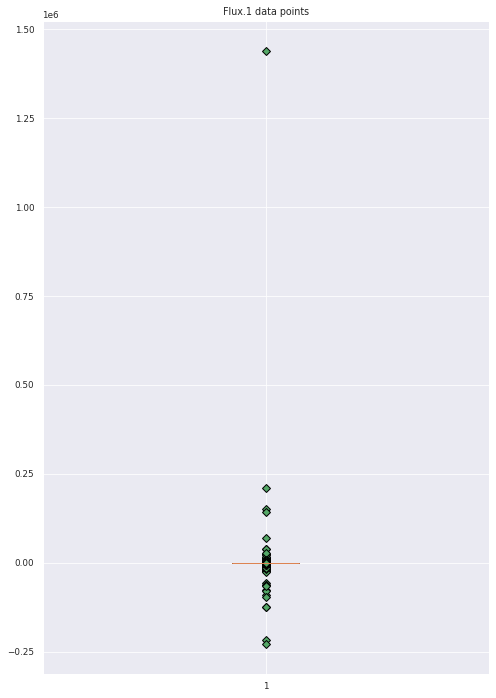

In [6]:
plt.figure(figsize = (8,12))

flux_one=train_data['FLUX.1']

green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(flux_one, flierprops= green_diamond)
plt.title('Flux.1 data points')

In [7]:
train_data1 = train_data[train_data['FLUX.1']<212000]

## Taking a look at some of our data points
In the first plot we show five rows that have exoplanets and five rows that do not have exoplanets. In the graphs below we will see that the data is not normalized, so that is a step we will need to take.

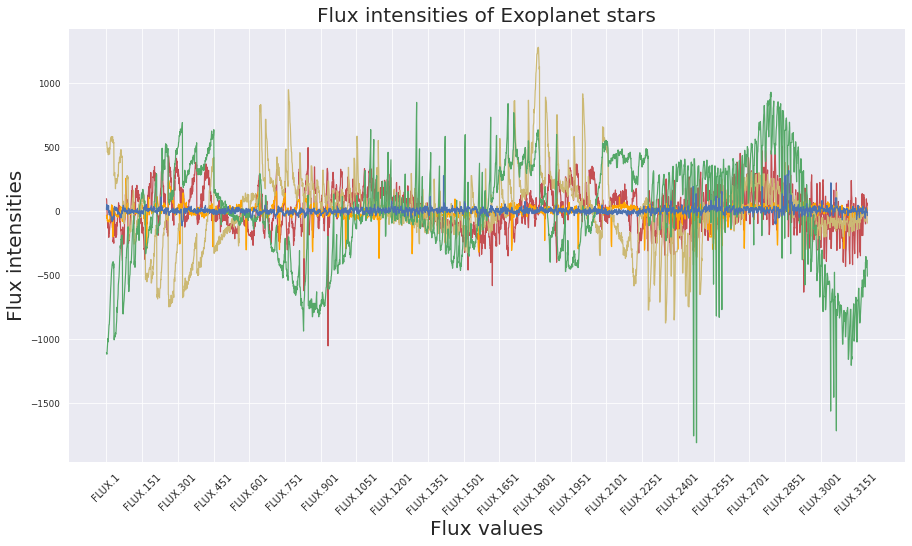

In [8]:
plt.figure(figsize = (15,8))
plt.title('Flux intensities of Exoplanet stars', size = 20)

plt.plot(train_data1.iloc[0,1:], color = 'r')
plt.plot(train_data1.iloc[1,1:], color = 'orange')
plt.plot(train_data1.iloc[2,1:], color = 'y')
plt.plot(train_data1.iloc[4,1:], color = 'g')
plt.plot(train_data1.iloc[6,1:], color = 'b')

plt.xlabel('Flux values', size = 20)
plt.ylabel('Flux intensities', size = 20)
plt.xticks(rotation = 45, ticks = np.arange(0,3197,150), size = 10)

plt.show()

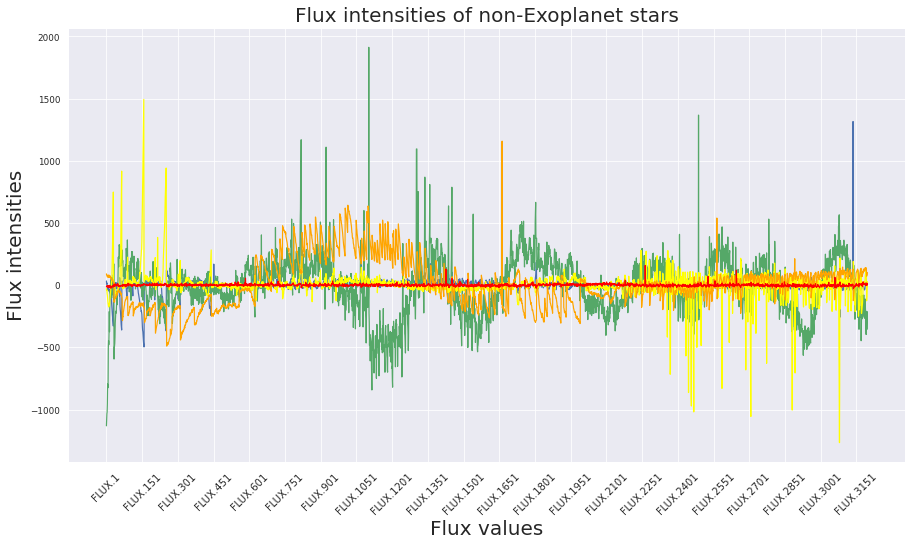

In [9]:
plt.figure(figsize = (15,8))
plt.title('Flux intensities of non-Exoplanet stars', size = 20)

plt.plot(train_data1.iloc[211,1:], color = 'b')
plt.plot(train_data1.iloc[200,1:], color = 'g')
plt.plot(train_data1.iloc[300,1:], color = 'yellow')
plt.plot(train_data1.iloc[400,1:], color = 'orange')
plt.plot(train_data1.iloc[500,1:], color = 'red')

plt.xlabel('Flux values', size = 20)
plt.ylabel('Flux intensities', size = 20)
plt.xticks(rotation = 45, ticks = np.arange(0,3197,150), size = 10)

plt.show()

In [10]:
'''Splitting the data into labels and features for both training and testing sets'''

train_fluxes = train_data.drop(columns = ['NEW_LABEL'])

train_labels = train_data['NEW_LABEL']

test_fluxes = test_data.drop(columns = ['NEW_LABEL'])

test_labels = test_data['NEW_LABEL']

## Normalizing the data


In [11]:
norm_train_fluxes = pd.DataFrame(normalize(train_fluxes))
norm_test_fluxes = pd.DataFrame(normalize(test_fluxes))

In [12]:
gauss_train_fluxes = pd.DataFrame(ndimage.filters.gaussian_filter(norm_train_fluxes, sigma = 10))

gauss_test_fluxes = ndimage.filters.gaussian_filter(norm_test_fluxes, sigma = 10)

In [13]:
scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(gauss_train_fluxes))
x_test = pd.DataFrame(scaler.fit_transform(gauss_test_fluxes))

# KNeighbors Classifier
The classifier we are going to use is the KNeighborsClassifier

In [14]:
'''Model KNeighborsClassifier'''

model = KNeighborsClassifier()

model.fit(x_train, train_labels)
predict = model.predict(test_fluxes)

print('Accuracy score:',accuracy_score(predict, test_labels))
print('Confusion matrix:\n',confusion_matrix(test_labels, predict))
print('Classification report:',classification_report(test_labels, predict))

Accuracy score: 0.9385964912280702
Confusion matrix:
 [[534  31]
 [  4   1]]
Classification report:               precision    recall  f1-score   support

           0       0.99      0.95      0.97       565
           1       0.03      0.20      0.05         5

    accuracy                           0.94       570
   macro avg       0.51      0.57      0.51       570
weighted avg       0.98      0.94      0.96       570



In [15]:
'''Reduced number of exoplanets'''
import random
random.seed(10)

exoplanets = pd.DataFrame(train_data[train_data['NEW_LABEL']==1])
nonexoplanets= train_data[train_data['NEW_LABEL']==0]

random_nums = []
for i in range(0,37):
    random_nums.append(random.randint(0,len(nonexoplanets)))
    
red_nonexoplanets = []
for i in random_nums:
    red_nonexoplanets.append(nonexoplanets.iloc[i])
    
df_nonexoplanets = pd.DataFrame(red_nonexoplanets)

In [16]:
reduced_data = pd.concat([df_nonexoplanets,exoplanets])

In [17]:
new_labels = []
for i in reduced_data['NEW_LABEL']:
    if i == 1.0:
        new_labels.append(1)
        
    if i == 0.0:
        new_labels.append(0)

reduced_data = reduced_data.drop(columns= ['NEW_LABEL'])
reduced_data.insert(0, 'LABEL', new_labels)

In [18]:
reduced_data['LABEL'].value_counts()

0    37
1    37
Name: LABEL, dtype: int64

In [22]:
features = reduced_data.drop(columns = ['LABEL'])
labels = reduced_data['LABEL']
train_features, test_features, train_labels1, test_labels1 = train_test_split(features, labels, train_size = .75, test_size = .25, shuffle = True, random_state = 314159)

In [23]:
norm_train_feat = normalize(train_features)
norm_test_feat = normalize(test_features)

gauss_train_fluxes1 = ndimage.filters.gaussian_filter(norm_train_feat, sigma = 10)
gauss_test_fluxes1 = ndimage.filters.gaussian_filter(norm_test_feat, sigma = 10)

scaler1 = StandardScaler()
train_feat = scaler1.fit_transform(gauss_train_fluxes1)
test_feat = scaler1.fit_transform(gauss_test_fluxes1)


In [24]:
model = KNeighborsClassifier()

model.fit(train_feat, train_labels1)
predict = model.predict(test_feat)

print('Accuracy score:',accuracy_score(predict, test_labels1))
print('Confusion matrix:\n',confusion_matrix(test_labels1, predict))
print('Classification report:',classification_report(test_labels1, predict))

Accuracy score: 0.42105263157894735
Confusion matrix:
 [[ 5  1]
 [10  3]]
Classification report:               precision    recall  f1-score   support

           0       0.33      0.83      0.48         6
           1       0.75      0.23      0.35        13

    accuracy                           0.42        19
   macro avg       0.54      0.53      0.41        19
weighted avg       0.62      0.42      0.39        19

